In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn

import itertools

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import SGDRegressor, BayesianRidge
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier


* We have loaded the necessary libraries above
* Now let's load the data

In [2]:
df = pd.read_csv("M:/CE888-DataScience/DataScience-CE888/lab3/bank-additional-full.csv", delimiter=";")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41182,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41183,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41184,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41187 entries, 0 to 41186
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41187 non-null  int64  
 1   job             41187 non-null  object 
 2   marital         41187 non-null  object 
 3   education       41187 non-null  object 
 4   default         41187 non-null  object 
 5   housing         41187 non-null  object 
 6   loan            41187 non-null  object 
 7   contact         41187 non-null  object 
 8   month           41187 non-null  object 
 9   day_of_week     41187 non-null  object 
 10  duration        41187 non-null  int64  
 11  campaign        41187 non-null  int64  
 12  pdays           41187 non-null  int64  
 13  previous        41187 non-null  int64  
 14  poutcome        41187 non-null  object 
 15  emp.var.rate    41187 non-null  float64
 16  cons.price.idx  41187 non-null  float64
 17  cons.conf.idx   41187 non-null 


Most columns are categorical (object). 
We'll check how many categories there are and how many examples for each.
Unknown values count as NaN

In [4]:
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6742
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [5]:
df['marital'].value_counts()

married     24928
single      11567
divorced     4612
unknown        80
Name: marital, dtype: int64

In [6]:
df['education'].value_counts()

university.degree      12168
high.school             9514
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [7]:
df['default'].value_counts()

no         32587
unknown     8597
yes            3
Name: default, dtype: int64

In [8]:
df['housing'].value_counts()

yes        21575
no         18622
unknown      990
Name: housing, dtype: int64

In [9]:
df['loan'].value_counts()

no         33949
yes         6248
unknown      990
Name: loan, dtype: int64

In [10]:
df['contact'].value_counts()

cellular     26144
telephone    15043
Name: contact, dtype: int64

In [11]:
df['month'].value_counts()

may    13768
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [12]:
df['day_of_week'].value_counts()

thu    8623
mon    8513
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [13]:
df['poutcome'].value_counts()

nonexistent    35562
failure         4252
success         1373
Name: poutcome, dtype: int64

Now let's do some checks of the numerical columns.

In [14]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41187.000000,41187.000000,41187.000000,41187.000000,41187.000000,41187.000000,41187.000000,41187.00000,41187.000000,41187.000000
mean,40.024037,258.286887,2.567631,962.474567,0.172967,0.081861,93.575654,-40.50270,3.621261,5167.035329
std,10.421375,259.282117,2.770036,186.913090,0.494906,1.570971,0.578843,4.62821,1.734458,72.252308
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.80000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.70000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.80000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.40000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.90000,5.045000,5228.100000


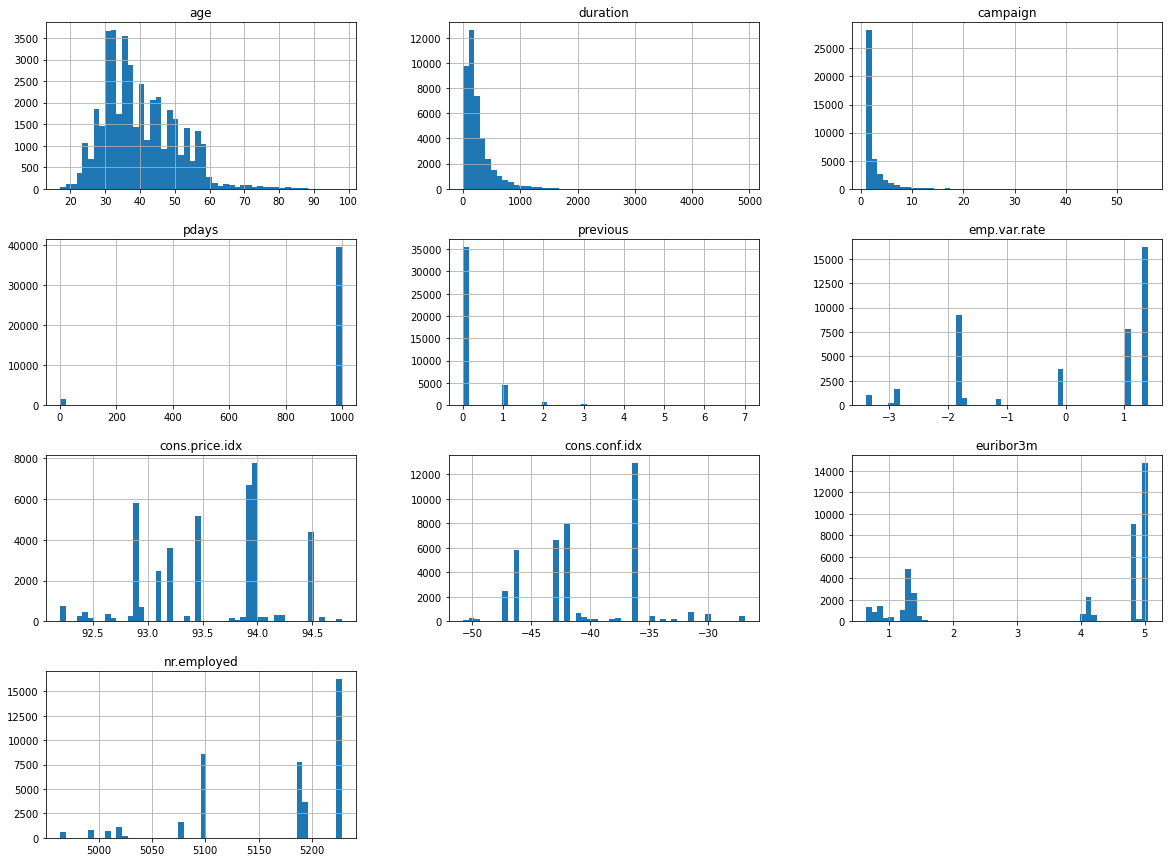

In [15]:
_ = df.hist(bins=50, figsize=(20,15))

We now have some information about our data that we can use to model. Let's move on to step 4 "Prepare the data for ML", but note that this is an iterative process (insights -> prototype -> analyse -> insights -> ...)

At this stage we can also do feature ingeneering: create more features from the ones you have and check if the correlation with the outcome improves. If we use them in our model, we'll need them later on for our test set as well, but we'll see how to do this below.

### Prepare data for ML algorithms

Use functions were possible:

    - Reproducing on a new dataset is easier
    - Reusable on other projects
    - To transform the data for deployment
    - Can see which transformations work best



### LabelEncoder

In [16]:
y_df = df.iloc[:,-1:].copy()
y_df = y_df.apply(LabelEncoder().fit_transform)

X_df = df.iloc[:,:-1].copy()
X_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41182,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41183,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41184,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41185,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6


### One-hot encoding

In [17]:
cat_features = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]

X_df = pd.get_dummies(X_df, cat_features)
X_df

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41182,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41183,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41184,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41185,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0


In [18]:
X_df = X_df.drop(['duration'], axis=1)
X_df

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41182,73,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,0,1,0,0,0,0,0,1,0
41183,46,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,0,1,0,0,0,0,0,1,0
41184,56,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,0,1,0,0,0,0,0,1,0
41185,44,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,...,0,0,1,0,0,0,0,0,1,0


In [19]:
# Most algorithms cannot work with missing values. Three main ways to deal with them:
# 1. Drop rows
# 2. Drop features with NaNs
# 3. Fill missing values
# As we have very few missing values, let's drop the rows
print("Number of rows before dropping NaNs: %d" % len(X_df))
X_df = X_df.dropna()
print("Number of rows after dropping NaNs: %d" % len(X_df))

# Separate features from outcomes



Number of rows before dropping NaNs: 41187
Number of rows after dropping NaNs: 41187


### Histogram Imbalance Plot

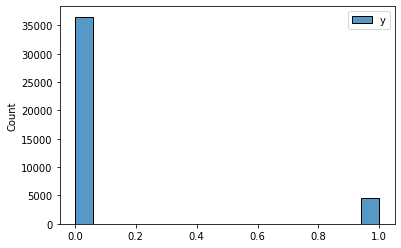

In [20]:
_ = sns.histplot(y_df, kde=False)

In [21]:
print(y_df.value_counts())
print(X_df.shape[0])

y
0    36547
1     4640
dtype: int64
41187


In [22]:
print(4640/41187)

0.11265690630538762


## Modeling Data

In [23]:
# Create separate training and test sets. we'll use the training set for steps 3--6
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=50)  
# by setting a random_state above, we make sure anytime we run this line we end up with the same train and test sets
print(len(X_train), len(X_test))

32949 8238


### Dummy

In [31]:
# Dummy
d_clf = DummyClassifier(strategy='stratified')
cv = cross_val_score(d_clf, X_df, y_df.values.ravel(), scoring='f1', cv=10)
print(cv.mean())

0.11718486183366769


### Random Forest Classifiers

In [32]:

clf = RandomForestClassifier(n_estimators=100, max_depth=3)
cv = cross_val_score(clf, X_df, y_df.values.ravel(), scoring='f1', cv=10)
print(cv.mean())


0.026055219492413233


In [33]:
clf = RandomForestClassifier(n_estimators=200, max_depth=8)
cv = cross_val_score(clf, X_df, y_df.values.ravel(), scoring='f1', cv=10)
print(cv.mean())

0.028033745488861533


In [34]:
clf = RandomForestClassifier(n_estimators=250, max_depth=6)
cv = cross_val_score(clf, X_df, y_df.values.ravel(), scoring='f1', cv=10)
print(cv.mean())

0.034459162963846414


In [29]:
clf = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=60)
cv = cross_val_score(clf, X_df, y_df.values.ravel(), scoring='f1', cv=10)
print(cv.mean())

0.032086321875539656


In [25]:
#sorted(sklearn.metrics.SCORERS.keys())